In [ ]:
#Importando as bibliotecas: 
import pandas as pd
import nltk
import string  
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from google.colab import drive
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Montando drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Bases de dados geradas em .csv após cada pré-processamento. Elas estão disponíveis no github do grupo.
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BASE-ATUAL.xlsx')
df_tratamentoInicial = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resultado.csv')
df_tokenizaçãoStopWords = pd.read_csv('/content/drive/MyDrive/df_tokenizaçãoStopWords.csv')
df_bagOfWords = pd.read_csv('/content/drive/MyDrive/df_bagOfWords.csv')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Análise da porcentagem dos comentários do BTG Pactual em relação aos outros comentários dos usuários no Instagram. 

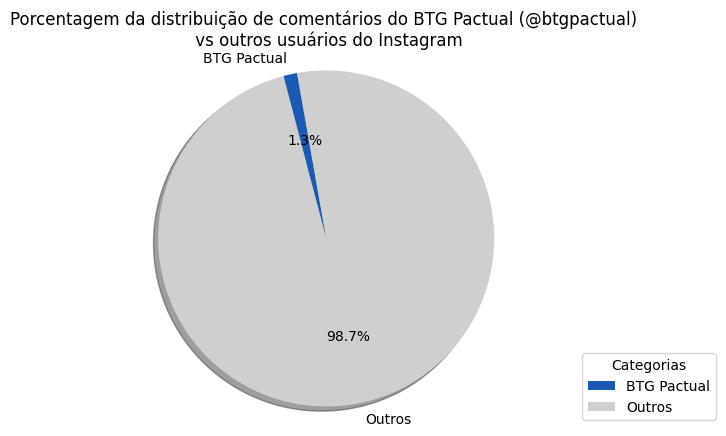

In [129]:
# Contagem de comentários feitos pelo BTG Pactual
num_comments_btg = len(df[df['"autor"'] == 'btgpactual'])

# Contagem de comentários feitos por outros usuários
num_comments_others = len(df[df['"autor"'] != 'btgpactual'])

# Cálculo das porcentagens
total_comments = num_comments_btg + num_comments_others
btg_percentage = (num_comments_btg / total_comments) * 100
others_percentage = (num_comments_others / total_comments) * 100


# Definindo as cores
colors = ['#195AB4', '#CFCFCF']

# Criação do gráfico de pizza
labels = ['BTG Pactual', 'Outros']
sizes = [btg_percentage, others_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, colors=colors)
ax1.axis('equal')
ax1.set_title('Porcentagem da distribuição de comentários do BTG Pactual (@btgpactual) \n vs outros usuários do Instagram')
ax1.legend(title='Categorias', loc='center right', bbox_to_anchor=(1.3, 0.1))
plt.show()


Análise da quantidade de palavras após cada etapa do pré-processamento:

In [130]:
# Base original fornecida pelo BTG Pactual (df)
df['Num Words'] = df['"texto"'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' da base original: ", df['"texto"'].str.split().str.len().sum())

# Base após remoção dos comentários do BTG Pactual (df_tratamentoInicial)
df_tratamentoInicial['Num Words'] = df_tratamentoInicial['texto'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' - dfClean: ", df_tratamentoInicial['texto'].str.split().str.len().sum())

# Base após tokenização e remoção de stopwords (df_tokenizaçãoStopWords)
df_tokenizaçãoStopWords['Num Words'] = df_tokenizaçãoStopWords['Frases_sem_stop_words'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' - df_semstopwords: ", df_tokenizaçãoStopWords['Frases_sem_stop_words'].str.split().str.len().sum())

# Base após bag of words (df_bagOfWords)
df_bagOfWords['Num Words'] = df_bagOfWords['Palavra'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'Palavra' - df_final: ", df_bagOfWords['Palavra'].str.split().str.len().sum())


Quantidade de palavras na coluna 'texto' da base original:  522820
Quantidade de palavras na coluna 'texto' - dfClean:  96218
Quantidade de palavras na coluna 'texto' - df_semstopwords:  42283
Quantidade de palavras na coluna 'Palavra' - df_final:  7597


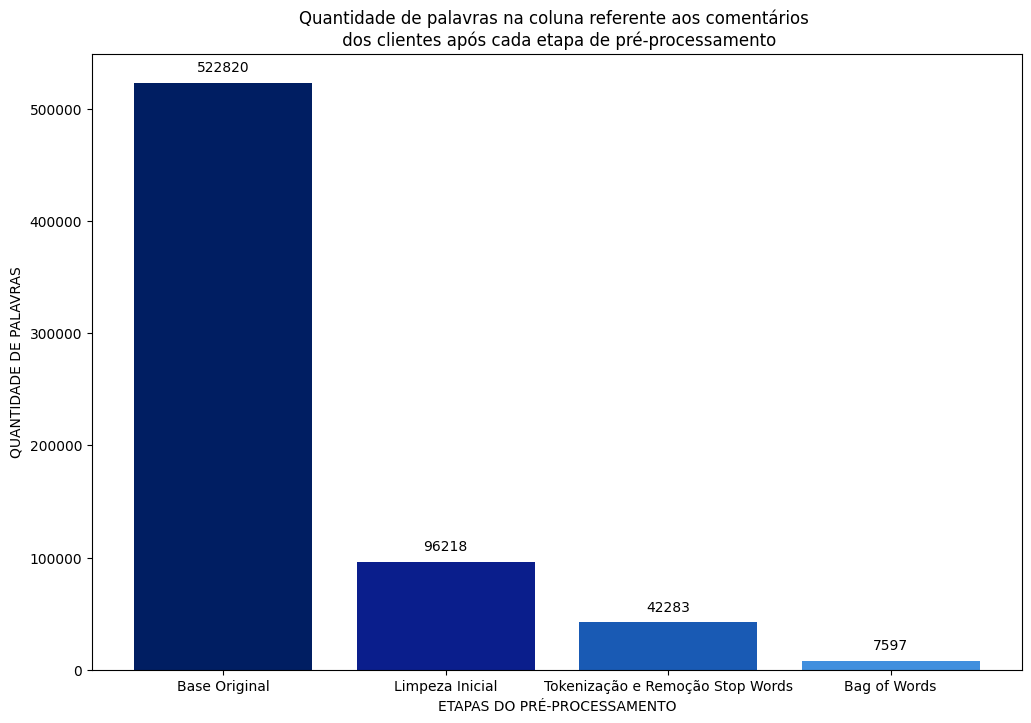

In [131]:
# Gráfico dos resultados das palavras após cada etapa do pré-processamento.

# Definindo a quantidade de palavras em cada base
word_count = [df['"texto"'].str.split().apply(len).sum(),
              df_tratamentoInicial['texto'].str.split().apply(len).sum(),
              df_tokenizaçãoStopWords['Frases_sem_stop_words'].str.split().apply(len).sum(),
              df_bagOfWords['Palavra'].str.split().apply(len).sum()]

# Definindo os rótulos para cada pré-processamento
labels = ['Base Original', 'Limpeza Inicial', 'Tokenização e Remoção Stop Words', 'Bag of Words']

# Criando um gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(labels, word_count)

# Adicionando rótulos aos eixos e título ao gráfico
ax.set_xlabel('ETAPAS DO PRÉ-PROCESSAMENTO')
ax.set_ylabel('QUANTIDADE DE PALAVRAS')
ax.set_title('Quantidade de palavras na coluna referente aos comentários \n dos clientes após cada etapa de pré-processamento')

# Adicionando os números de palavras acima de cada barra
for i, v in enumerate(word_count):
    ax.text(i, v + 10000, str(v), ha='center')

colors = ['#001E62', '#0A1E8C', '#195AB4', '#418FDE']
ax.bar(labels, word_count, color=colors)

# Mostrando o gráfico
plt.show()


Análise do número de linhas e colunas da primeira e da última base.

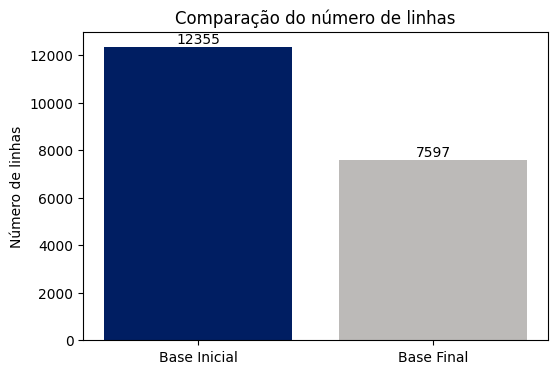

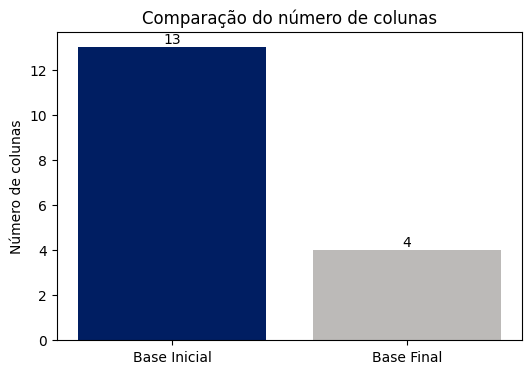

In [132]:
# quantidade de linhas e colunas em df
num_rows_df = df.shape[0]
num_columns_df = df.shape[1]

# quantidade de linhas e colunas em df_bagOfWords
num_rows_df_final = df_bagOfWords.shape[0]
num_columns_df_final = df_bagOfWords.shape[1]

# Gráfico de barras para as linhas
fig, ax = plt.subplots()
fig.set_size_inches(6, 4) # define o tamanho da figura
rects1 = ax.bar(['Base Inicial', 'Base Final'], [num_rows_df, num_rows_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Comparação do número de linhas')
ax.set_ylabel('Número de linhas')

# Adiciona o número respectivo em cima de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.1),  # desloca o texto 0.1 pontos acima
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

# Gráfico de barras para as colunas
fig, ax = plt.subplots()
fig.set_size_inches(6, 4) # define o tamanho da figura
rects2 = ax.bar(['Base Inicial', 'Base Final'], [num_columns_df, num_columns_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Comparação do número de colunas')
ax.set_ylabel('Número de colunas')

# Adiciona o número respectivo em cima de cada barra
autolabel(rects2)
plt.show()


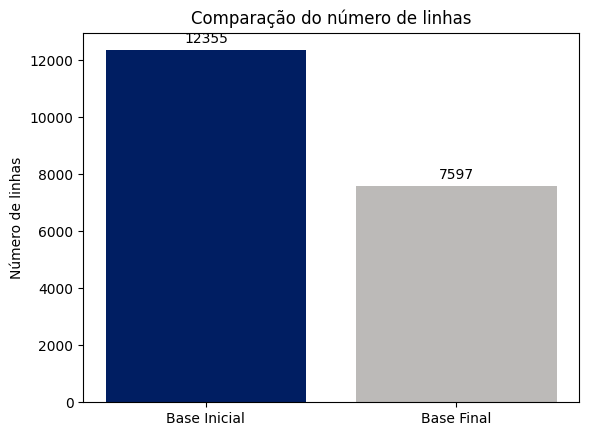

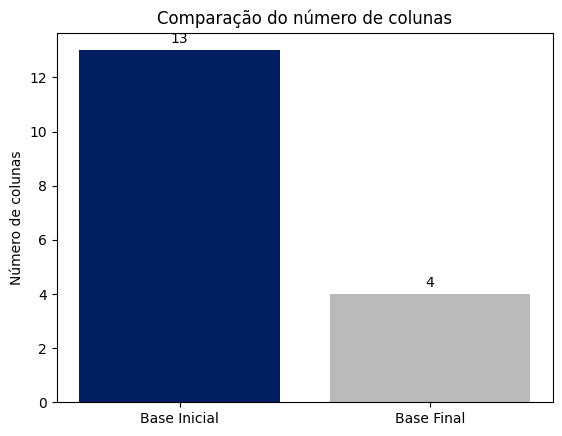

In [133]:
import matplotlib.pyplot as plt

# quantidade de linhas e colunas em df
num_rows_df = df.shape[0]
num_columns_df = df.shape[1]

# quantidade de linhas e colunas em df_bagOfWords
num_rows_df_final = df_bagOfWords.shape[0]
num_columns_df_final = df_bagOfWords.shape[1]

# Gráfico de barras para as linhas
fig, ax = plt.subplots()
rects1 = ax.bar(['Base Inicial', 'Base Final'], [num_rows_df, num_rows_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Comparação do número de linhas')
ax.set_ylabel('Número de linhas')

# Adiciona o número respectivo em cima de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # desloca o texto 3 pontos acima
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

# Gráfico de barras para as colunas
fig, ax = plt.subplots()
rects2 = ax.bar(['Base Inicial', 'Base Final'], [num_columns_df, num_columns_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Comparação do número de colunas')
ax.set_ylabel('Número de colunas')

# Adiciona o número respectivo em cima de cada barra
autolabel(rects2)
plt.show()


Hipóteses do grupo de colunas que afetem e não afetam a análise dos sentimentos dos cliente. 

## Colunas que não afetam na análise de sentimento:

Segundo nossas hipóteses, as colunas que podem não estar relacionadas a verificação do sentimento dos clientes do BTG Pactual através dos comentários são:

- id: esta informação não tem relação direta com o sentimento do cliente e não ajudará a entender sua opinião sobre seus produtos ou serviços.
- Autor: informação não diretamente relacionada ao sentimento do cliente, a menos que haja uma hipótese específica sobre isso.
- Tipo de Interação: informação não diretamente relacionada ao sentimento do cliente e não ajudará a entender sua opinião sobre seus produtos ou serviços.
- Link do post: informação não diretamente relacionada ao sentimento do cliente e não ajudará a entender sua opinião sobre seus produtos ou serviços.
- Processado: Esta coluna pode ser relevante dependendo do seu objetivo de análise. Se a coluna indicar se um comentário foi processado por um software de análise de sentimento, por exemplo, ela pode ser útil para entender a precisão dos resultados da análise.
- Contém Hyperlink: informação não diretamente relacionada ao sentimento do cliente e não ajudará a entender sua opinião sobre seus produtos ou serviços.
- Probabilidade de anomalia: Esta coluna pode ser relevante dependendo do seu objetivo de análise. Se a coluna indicar a probabilidade de um comentário ser uma anomalia, ela pode ser útil para entender a qualidade geral dos dados.

## Colunas que tem relação direta com o resultado da análise de sentimento dos clientes:

Já as colunas que podem ter relação direta com 

- Texto: Esta é a coluna mais importante, pois contém o feedback direto dos clientes sobre seus produtos ou serviços.
- Data da Publicação: A data pode ser útil para detectar tendências temporais e mudanças na percepção do cliente ao longo do tempo.
- Sentimento: Esta coluna é importante, pois é onde está registrado o sentimento do cliente em relação ao produto ou serviço.

Gráfico das colunas relevantes e irrelevantes segundo hipóteses feitas pelo grupo. 

<ipython-input-135-45758667c69c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columns, rotation=90)


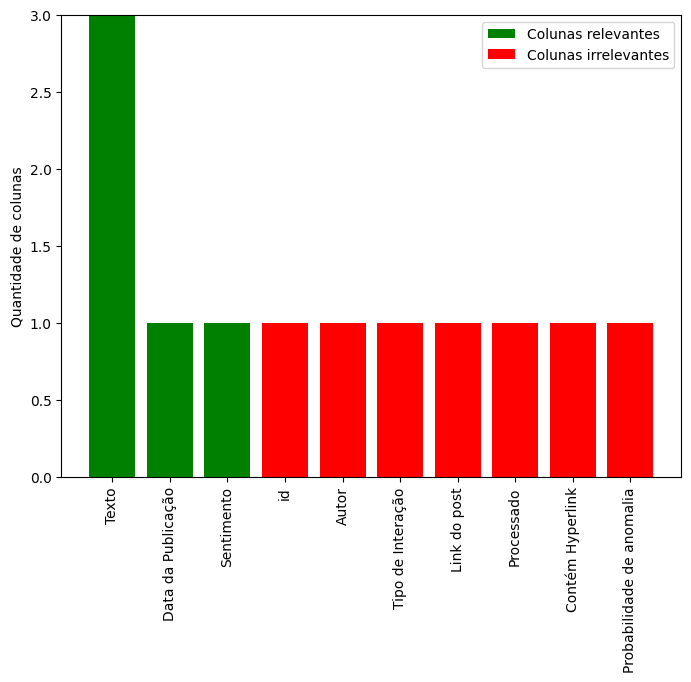

In [135]:
# Definir os dados do gráfico
columns = ['Texto', 'Data da Publicação', 'Sentimento', 'id', 'Autor', 'Tipo de Interação', 'Link do post', 'Processado', 'Contém Hyperlink', 'Probabilidade de anomalia']
relevant_quantity = [3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
irrelevant_quantity = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(columns, relevant_quantity, color='green', label='Colunas relevantes')
ax.bar(columns, irrelevant_quantity, bottom=relevant_quantity, color='red', label='Colunas irrelevantes')
ax.set_xticklabels(columns, rotation=90)
ax.set_ylabel('Quantidade de colunas')
ax.legend()

plt.show()


In [137]:
# Contagem de sentimentos
fellings = df_tokenizaçãoStopWords['sentimento'].value_counts()
print(fellings)

# Contagem de palavras na primeira base "df"
words_df = df['"texto"'].str.split().apply(len).sum()
print("Número total de palavras nos comentários da base inicial:", words_df)

# Contagem de palavras na última base
words_df_tokenizaçãoStopWords = df_tokenizaçãoStopWords['texto'].str.split().apply(len).sum()
print("Número total de palavras nos comentários da base após tratamento:", df_tokenizaçãoStopWords)


NEUTRAL     2798
NEGATIVE    1952
POSITIVE    1606
Name: sentimento, dtype: int64
Número total de palavras nos comentários da base inicial: 522820
Número total de palavras nos comentários da base após tratamento:               dataPublicada                     autor  \
0     "2022-03-04 08:36:00"                lmviapiana   
1     "2022-03-03 21:10:00"              vanilson_dos   
2     "2022-03-03 20:54:00"               ricktolledo   
3     "2022-03-03 18:56:00"          claudiofalavinha   
4     "2022-03-03 16:11:00"     paularodrigues.invest   
...                     ...                       ...   
6351  "2022-11-30 07:48:00"  perspectiveinvestimentos   
6352  "2022-11-30 08:42:00"              marlenenelso   
6353  "2022-11-30 11:27:00"            eduardocolares   
6354  "2022-11-30 12:18:00"             jayipacderota   
6355  "2022-11-30 14:27:00"                 bfmarilia   

                                                  texto sentimento  \
0                               

Porcentagem dos sentimentos dos cliente (na porcentagem de neutros há a consideração de emojis, o que torna o número impreciso).

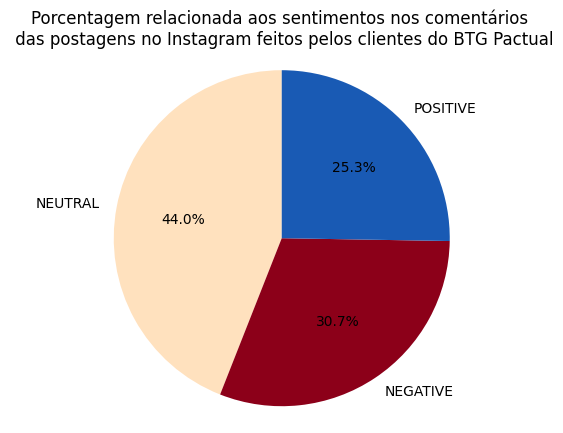

In [138]:
# Lista de cores
colors = ['#FFE1BE', '#8C0019', '#195AB4']

# Contagem de sentimentos
fellings = df_tokenizaçãoStopWords['sentimento'].value_counts()

# Cria um gráfico de pizza com as contagens de sentimentos
fig, ax = plt.subplots()
ax.pie(fellings.values, labels=fellings.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')

plt.title('Porcentagem relacionada aos sentimentos nos comentários \n das postagens no Instagram feitos pelos clientes do BTG Pactual')

# Mostra o gráfico
plt.show()


Função "describe" da base de dados inicial. 

In [ ]:
df.describe()

,id,"""anomalia""","""probabilidadeAnomalia""","""processado""","""contemHyperlink""",Num Palavras
count,1.235500e+04,12355.000000,12355.000000,12355.0,12355.000000,12355.000000
mean,1.757789e+06,0.222339,37.325698,0.0,0.005423,50.273007
std,7.967971e+05,0.415835,16.374936,0.0,0.073443,62.843977
min,1.000000e+00,0.000000,7.000000,0.0,0.000000,1.000000
25%,1.314377e+06,0.000000,24.000000,0.0,0.000000,7.000000
50%,1.783879e+06,0.000000,37.000000,0.0,0.000000,25.000000
75%,2.388714e+06,0.000000,48.000000,0.0,0.000000,71.000000
max,3.045012e+06,1.000000,100.000000,0.0,1.000000,336.000000


20 palavras mais ditas nos comentários:

In [ ]:
# Ordena as palavras em ordem decrescente pela frequência e seleciona as 20 primeiras
top_words = df_bagOfWords.sort_values(by='Frequência', ascending=False)['Palavra'].head(20).tolist()

# Imprime as 20 palavras mais frequentes
print('As 20 palavras mais frequentes são: ', top_words)


As 20 palavras mais frequentes são:  ['banco', 'btg', 'pra', 'limite', 'conta', 'cartão', 'melhor', 'agora', 'sempre', 'fazer', 'vai', 'dinheiro', 'ter', 'vcs', 'obrigado', 'flu', 'tudo', 'nunca', 'sobre', 'todos']
